In [2]:
import pandas as pd
import numpy as np
# import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, precision_recall_curve, average_precision_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import gc

pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import xgboost as xgb

In [3]:
%%time
df_train = pd.read_csv('train.csv.zip')
df_test = pd.read_csv('test.csv.zip')

Wall time: 32.7 s


In [16]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_0_2,var_0_3,var_1_2,var_1_3,var_2_2,var_2_3,var_3_2,var_3_3,var_4_2,var_4_3,var_5_2,var_5_3,var_6_2,var_6_3,var_7_2,var_7_3,var_8_2,var_8_3,var_9_2,var_9_3,var_10_2,var_10_3,var_11_2,var_11_3,var_12_2,var_12_3,var_13_2,var_13_3,var_14_2,var_14_3,var_15_2,var_15_3,var_16_2,var_16_3,var_17_2,var_17_3,var_18_2,var_18_3,var_19_2,var_19_3,var_20_2,var_20_3,var_21_2,var_21_3,var_22_2,var_22_3,var_23_2,var_23_3,var_24_2,var_24_3,var_25_2,var_25_3,var_26_2,var_26_3,var_27_2,var_27_3,var_28_2,var_28_3,var_29_2,var_29_3,var_30_2,var_30_3,var_31_2,var_31_3,var_32_2,var_32_3,var_33_2,var_33_3,var_34_2,var_34_3,var_35_2,var_35_3,var_36_2,var_36_3,var_37_2,var_37_3,var_38_2,var_38_3,var_39_2,var_39_3,var_40_2,var_40_3,var_41_2,var_41_3,var_42_2,var_42_3,var_43_2,var_43_3,var_44_2,var_44_3,var_45_2,var_45_3,var_46_2,var_46_3,var_47_2,var_47_3,var_48_2,var_48_3,var_49_2,var_49_3,var_50_2,var_50_3,var_51_2,var_51_3,var_52_2,var_52_3,var_53_2,var_53_3,var_54_2,var_54_3,var_55_2,var_55_3,var_56_2,var_56_3,var_57_2,var_57_3,var_58_2,var_58_3,var_59_2,var_59_3,var_60_2,var_60_3,var_61_2,var_61_3,var_62_2,var_62_3,var_63_2,var_63_3,var_64_2,var_64_3,var_65_2,var_65_3,var_66_2,var_66_3,var_67_2,var_67_3,var_68_2,var_68_3,var_69_2,var_69_3,var_70_2,var_70_3,var_71_2,var_71_3,var_72_2,var_72_3,var_73_2,var_73_3,var_74_2,var_74_3,var_75_2,var_75_3,var_76_2,var_76_3,var_77_2,var_77_3,var_78_2,var_78_3,var_79_2,var_79_3,var_80_2,var_80_3,var_81_2,var_81_3,var_82_2,var_82_3,var_83_2,var_83_3,var_84_2,var_84_3,var_85_2,var_85_3,var_86_2,var_86_3,var_87_2,var_87_3,var_88_2,var_88_3,var_89_2,var_89_3,var_90_2,var_90_3,var_91_2,var_91_3,var_92_2,var_92_3,var_93_2,var_93_3,var_94_2,var_94_3,var_95_2,var_95_3,var_96_2,var_96_3,var_97_2,var_97_3,var_98_2,var_98_3,var_99_2,var_99_3,var_100_2,var_100_3,var_101_2,var_101_3,var_102_2,var_102_3,var_103_2,var_103_3,var_104_2,var_104_3,var_105_2,var_105_3,var_106_2,var_106_3,var_107_2,var_107_3,var_108_2,var_108_3,var_109_2,var_109_3,var_110_2,var_110_3,var_111_2,var_111_3,var_112_2,var_112_3,var_113_2,var_113_3,var_114_2,var_114_3,var_115_2,var_115_3,var_116_2,var_116_3,var_117_2,var_117_3,var_118_2,var_118_3,var_119_2,var_119_3,var_120_2,var_120_3,var_121_2,var_121_3,var_122_2,var_122_3,var_123_2,var_123_3,var_124_2,var_124_3,var_125_2,var_125_3,var_126_2,var_126_3,var_127_2,var_127_3,var_128_2,var_128_3,var_129_2,var_129_3,var_130_2,var_130_3,var_131_2,var_131_3,var_132_2,var_132_3,var_133_2,var_133_3,var_134_2,var_134_3,var_135_2,var_

In [5]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [6]:
train_cols = [col for col in df_train.columns if col not in ['ID_code', 'target']]
y_train = df_train['target']
test_cols = train_cols

In [7]:
# %%time
# for col in train_cols:
#     df_train[col] = (df_train[col]/max(df_train[col]))
#     df_test[col] = (df_test[col]/max(df_test[col]))

In [8]:
#Interactions from initial decision tree analysis
# interactions1= {'var_81':['var_53','var_139','var_12'],
#                'var_12':['var_139','var_26','var_22'],
#                'var_139':['var_146','var_26','var_53'],
#                'var_53':['var_110']}

In [9]:
interactions= {'var_81':['var_53','var_139','var_12','var_76'],
               'var_12':['var_139','var_26','var_22', 'var_53','var_110','var_13'],
               'var_139':['var_146','var_26','var_53', 'var_6', 'var_118'],
               'var_53':['var_110','var_6'],
              'var_26':['var_110','var_109','var_12'],
              'var_118':['var_156'],
              'var_9':['var_89'],
              'var_22':['var_28','var_99','var_26'],
              'var_166':['var_110'],
              'var_146':['var_40','var_0'],
              'var_80':['var_12']}

### Add new square and cube features

In [10]:
%%time
for col in train_cols:
        df_train[col+'_2'] = df_train[col] * df_train[col]
        df_train[col+'_3'] = df_train[col] * df_train[col]* df_train[col]
#         df_train[col+'_4'] = df_train[col] * df_train[col]* df_train[col]* df_train[col]
        df_test[col+'_2'] = df_test[col] * df_test[col]
        df_test[col+'_3'] = df_test[col] * df_test[col]* df_test[col]

Wall time: 12.3 s


In [11]:
%%time
for key in interactions:
    for value in interactions[key]:
        df_train[key+'_'+value+'_mul'] = df_train[key]*df_train[value]
        df_train[key+'_'+value+'_div'] = df_train[key]/df_train[value]
        df_train[key+'_'+value+'_sum'] = df_train[key] + df_train[value]
        df_train[key+'_'+value+'_sub'] = df_train[key] - df_train[value]
        
        df_test[key+'_'+value+'_mul'] = df_test[key]*df_test[value]
        df_test[key+'_'+value+'_div'] = df_test[key]/df_test[value]
        df_test[key+'_'+value+'_sum'] = df_test[key] + df_test[value]
        df_test[key+'_'+value+'_sub'] = df_test[key] - df_test[value]

Wall time: 4.33 s


In [17]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_0_2,var_0_3,var_1_2,var_1_3,var_2_2,var_2_3,var_3_2,var_3_3,var_4_2,var_4_3,var_5_2,var_5_3,var_6_2,var_6_3,var_7_2,var_7_3,var_8_2,var_8_3,var_9_2,var_9_3,var_10_2,var_10_3,var_11_2,var_11_3,var_12_2,var_12_3,var_13_2,var_13_3,var_14_2,var_14_3,var_15_2,var_15_3,var_16_2,var_16_3,var_17_2,var_17_3,var_18_2,var_18_3,var_19_2,var_19_3,var_20_2,var_20_3,var_21_2,var_21_3,var_22_2,var_22_3,var_23_2,var_23_3,var_24_2,var_24_3,var_25_2,var_25_3,var_26_2,var_26_3,var_27_2,var_27_3,var_28_2,var_28_3,var_29_2,var_29_3,var_30_2,var_30_3,var_31_2,var_31_3,var_32_2,var_32_3,var_33_2,var_33_3,var_34_2,var_34_3,var_35_2,var_35_3,var_36_2,var_36_3,var_37_2,var_37_3,var_38_2,var_38_3,var_39_2,var_39_3,var_40_2,var_40_3,var_41_2,var_41_3,var_42_2,var_42_3,var_43_2,var_43_3,var_44_2,var_44_3,var_45_2,var_45_3,var_46_2,var_46_3,var_47_2,var_47_3,var_48_2,var_48_3,var_49_2,var_49_3,var_50_2,var_50_3,var_51_2,var_51_3,var_52_2,var_52_3,var_53_2,var_53_3,var_54_2,var_54_3,var_55_2,var_55_3,var_56_2,var_56_3,var_57_2,var_57_3,var_58_2,var_58_3,var_59_2,var_59_3,var_60_2,var_60_3,var_61_2,var_61_3,var_62_2,var_62_3,var_63_2,var_63_3,var_64_2,var_64_3,var_65_2,var_65_3,var_66_2,var_66_3,var_67_2,var_67_3,var_68_2,var_68_3,var_69_2,var_69_3,var_70_2,var_70_3,var_71_2,var_71_3,var_72_2,var_72_3,var_73_2,var_73_3,var_74_2,var_74_3,var_75_2,var_75_3,var_76_2,var_76_3,var_77_2,var_77_3,var_78_2,var_78_3,var_79_2,var_79_3,var_80_2,var_80_3,var_81_2,var_81_3,var_82_2,var_82_3,var_83_2,var_83_3,var_84_2,var_84_3,var_85_2,var_85_3,var_86_2,var_86_3,var_87_2,var_87_3,var_88_2,var_88_3,var_89_2,var_89_3,var_90_2,var_90_3,var_91_2,var_91_3,var_92_2,var_92_3,var_93_2,var_93_3,var_94_2,var_94_3,var_95_2,var_95_3,var_96_2,var_96_3,var_97_2,var_97_3,var_98_2,var_98_3,var_99_2,var_99_3,var_100_2,var_100_3,var_101_2,var_101_3,var_102_2,var_102_3,var_103_2,var_103_3,var_104_2,var_104_3,var_105_2,var_105_3,var_106_2,var_106_3,var_107_2,var_107_3,var_108_2,var_108_3,var_109_2,var_109_3,var_110_2,var_110_3,var_111_2,var_111_3,var_112_2,var_112_3,var_113_2,var_113_3,var_114_2,var_114_3,var_115_2,var_115_3,var_116_2,var_116_3,var_117_2,var_117_3,var_118_2,var_118_3,var_119_2,var_119_3,var_120_2,var_120_3,var_121_2,var_121_3,var_122_2,var_122_3,var_123_2,var_123_3,var_124_2,var_124_3,var_125_2,var_125_3,var_126_2,var_126_3,var_127_2,var_127_3,var_128_2,var_128_3,var_129_2,var_129_3,var_130_2,var_130_3,var_131_2,var_131_3,var_132_2,var_132_3,var_133_2,var_133_3,var_134_2,var_134_3,var_135_2,var_

In [18]:
all_columns = [col for col in df_train.columns if col not in ['ID_code', 'target']]

In [19]:
len(all_columns)

716

In [15]:
df_train.shape

(200000, 718)

## Ignore the LGBM in this notebook

In [17]:
# Defining parameters
params = {
        'num_leaves': 7,
        'max_bin': 63,
        'min_data_in_leaf': 45,
        'learning_rate': 0.007,
        'min_sum_hessian_in_leaf': 0.000446,
        'bagging_fraction': 0.55, 
        'bagging_freq': 5, 
        'max_depth': 14,
        'save_binary': True,
        'feature_fraction': 0.51,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
        'device': 'gpu',
        'gpu_platform_id':1,
        'gpu_device_id': 0
    }

num_round = 20000

In [18]:
%%time

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12345)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_import_df = pd.DataFrame()

for n_fold, (train_idx, val_idx) in enumerate(folds.split(df_train, y_train)):
    print("fold number =", n_fold+1)
    train_data = lgb.Dataset(df_train.iloc[train_idx][all_columns], label = y_train.iloc[train_idx])
    val_y = y_train.iloc[val_idx]
    val_data = lgb.Dataset(df_train.iloc[val_idx][all_columns], label = val_y)
    
    
    watchlist = [train_data,val_data]
    clf = lgb.train(params, train_data, num_boost_round = num_round,
                   valid_sets = watchlist, verbose_eval = 4000,
                   early_stopping_rounds=3000)
    
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][all_columns], num_iteration=clf.best_iteration)
    
    fold_import_df = pd.DataFrame()
    fold_import_df['Feature'] = all_columns
    fold_import_df["importance"] = clf.feature_importance()
    fold_import_df['fold'] = n_fold +1
    feature_import_df = pd.concat([feature_import_df,fold_import_df], axis = 0)
    
    predictions += clf.predict(df_test[all_columns])/folds.n_splits
    
    print("\tFold AUC Score: {}\tf1_score: {}\n".format(roc_auc_score(val_y,oof[val_idx]),
                                                       f1_score(val_y,np.round(oof[val_idx]))))
    gc.collect()
          
print("\n CV AUC Score and std", roc_auc_score(y_train, oof),np.std(oof))
print("CV F1 Score", f1_score(y_train, np.round(oof)))

fold number = 1
Training until validation scores don't improve for 3000 rounds.
[4000]	training's auc: 0.907796	valid_1's auc: 0.883452
[8000]	training's auc: 0.926347	valid_1's auc: 0.894455
[12000]	training's auc: 0.938141	valid_1's auc: 0.896221
[16000]	training's auc: 0.949003	valid_1's auc: 0.896471
Early stopping, best iteration is:
[15682]	training's auc: 0.948174	valid_1's auc: 0.896559
	Fold AUC Score: 0.8965588043219603	f1_score: 0.5040518638573743

fold number = 2
Training until validation scores don't improve for 3000 rounds.
[4000]	training's auc: 0.907492	valid_1's auc: 0.882432
[8000]	training's auc: 0.926081	valid_1's auc: 0.893632
[12000]	training's auc: 0.937956	valid_1's auc: 0.89539
[16000]	training's auc: 0.948825	valid_1's auc: 0.895257
Early stopping, best iteration is:
[13208]	training's auc: 0.941416	valid_1's auc: 0.895508
	Fold AUC Score: 0.8955079180125607	f1_score: 0.49876857074759673

fold number = 3
Training until validation scores don't improve for 3000 

In [15]:
print(predictions[:-5])
# del clf

[0.16506881 0.24289104 0.25803956 ... 0.29905439 0.03168638 0.17597724]


In [19]:
sub = pd.DataFrame({'ID_code':df_test.ID_code.values, 'target': predictions})

In [20]:
sub.to_csv('sub_lgbm_feateng3.csv', index = False)

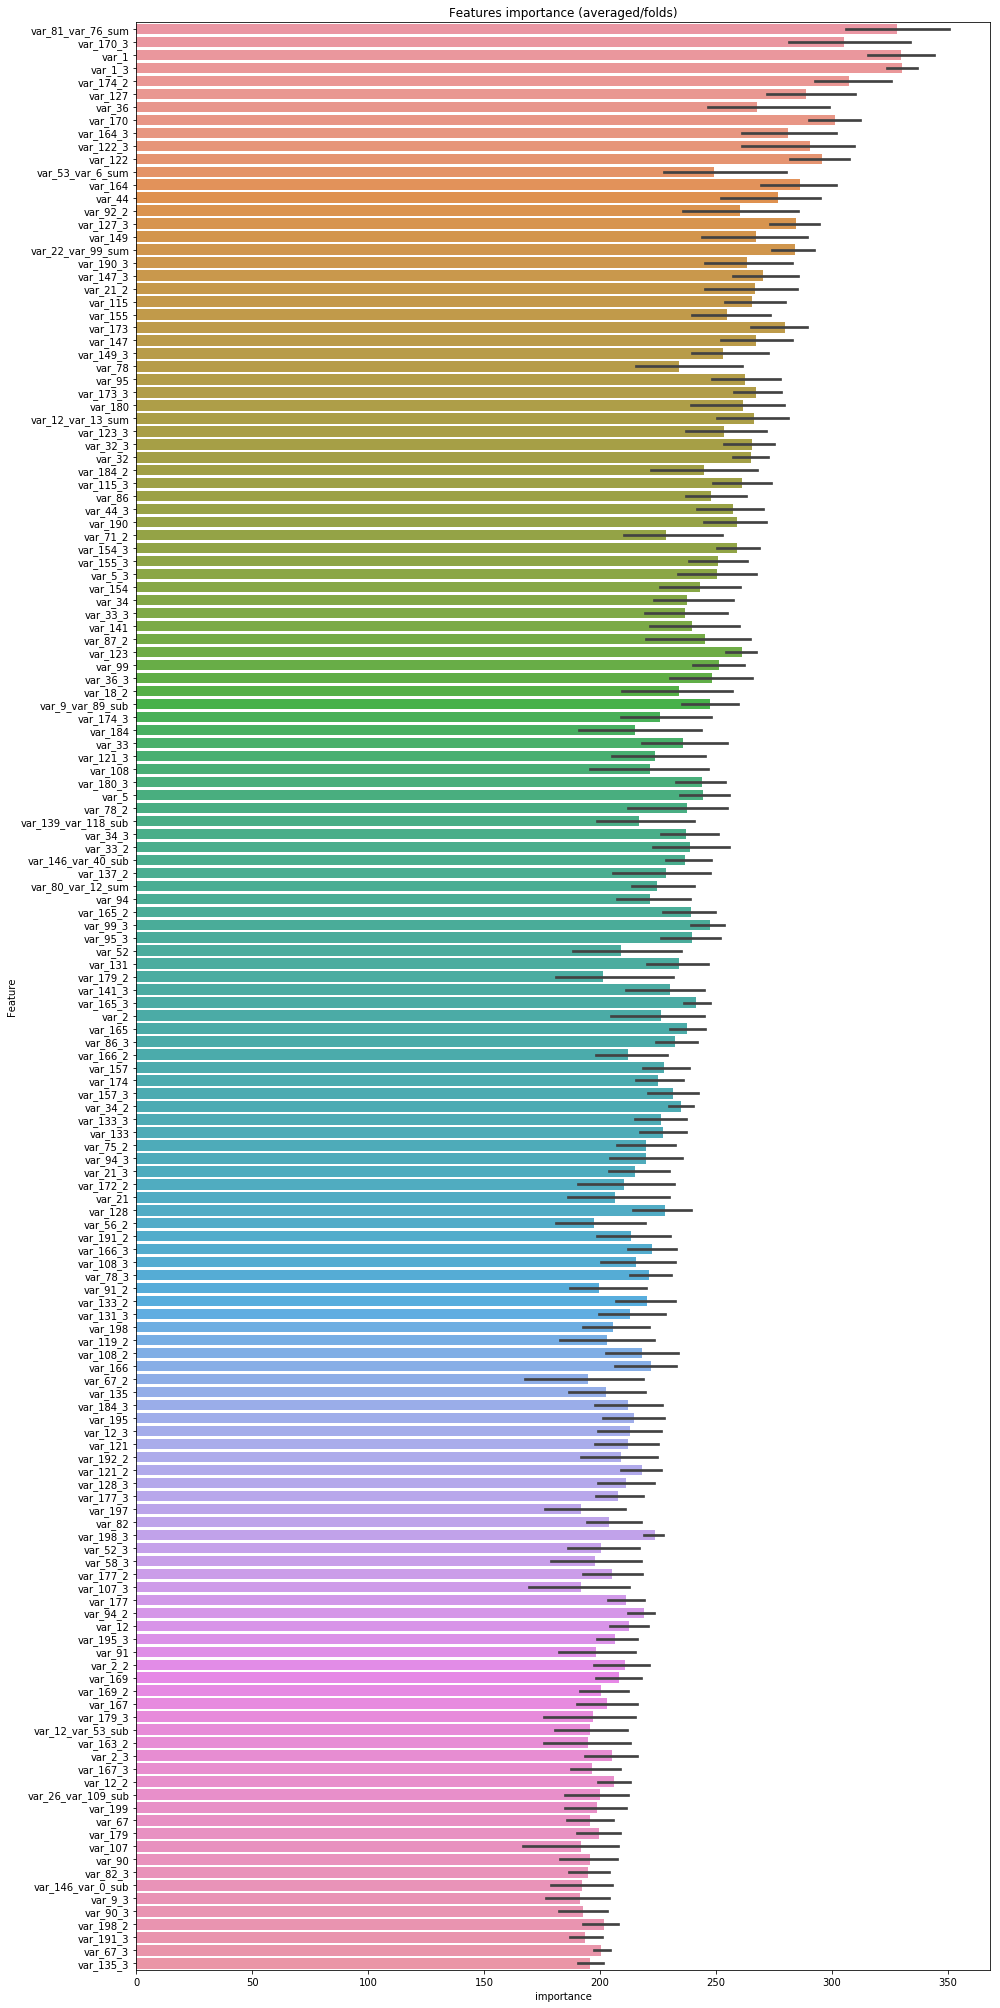

In [22]:
cols = (feature_import_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_import_df.loc[feature_import_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('lgbm_feateng3_kfold.png')

## 1st LGBM results with feat eng 1
fold number = 1
Training until validation scores don't improve for 500 rounds.
[4000]	training's auc: 0.892215	valid_1's auc: 0.873452
[8000]	training's auc: 0.913426	valid_1's auc: 0.888912
[12000]	training's auc: 0.922931	valid_1's auc: 0.894456
[16000]	training's auc: 0.929958	valid_1's auc: 0.896282
Early stopping, best iteration is:
[18028]	training's auc: 0.933448	valid_1's auc: 0.896588
	Fold AUC Score: 0.8965882076236754	f1_score: 0.49308431663671176

fold number = 2
Training until validation scores don't improve for 500 rounds.
[4000]	training's auc: 0.891886	valid_1's auc: 0.871357
[8000]	training's auc: 0.913196	valid_1's auc: 0.88849
[12000]	training's auc: 0.922642	valid_1's auc: 0.893749
[16000]	training's auc: 0.929665	valid_1's auc: 0.895506
Early stopping, best iteration is:
[18906]	training's auc: 0.934673	valid_1's auc: 0.896054
	Fold AUC Score: 0.8960543645132776	f1_score: 0.49463544521888947

fold number = 3
Training until validation scores don't improve for 500 rounds.
[4000]	training's auc: 0.892345	valid_1's auc: 0.870016
[8000]	training's auc: 0.913535	valid_1's auc: 0.886724
[12000]	training's auc: 0.922934	valid_1's auc: 0.892547
[16000]	training's auc: 0.929881	valid_1's auc: 0.894712
[20000]	training's auc: 0.936635	valid_1's auc: 0.895356
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.936635	valid_1's auc: 0.895356
	Fold AUC Score: 0.8953557462824842	f1_score: 0.4922419252691576

fold number = 4
Training until validation scores don't improve for 500 rounds.
[4000]	training's auc: 0.891766	valid_1's auc: 0.872823
[8000]	training's auc: 0.913119	valid_1's auc: 0.889246
[12000]	training's auc: 0.922954	valid_1's auc: 0.894581
[16000]	training's auc: 0.929943	valid_1's auc: 0.896187
Early stopping, best iteration is:
[16837]	training's auc: 0.931353	valid_1's auc: 0.896338
	Fold AUC Score: 0.8963383558447567	f1_score: 0.4915598624570179

fold number = 5
Training until validation scores don't improve for 500 rounds.
[4000]	training's auc: 0.889907	valid_1's auc: 0.87716
[8000]	training's auc: 0.911757	valid_1's auc: 0.894983
[12000]	training's auc: 0.921409	valid_1's auc: 0.900965
[16000]	training's auc: 0.928489	valid_1's auc: 0.902961
[20000]	training's auc: 0.935445	valid_1's auc: 0.903437
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.935445	valid_1's auc: 0.903437
	Fold AUC Score: 0.9034369264061302	f1_score: 0.5054997230355306


 CV AUC Score and std 0.8975580577229142 0.26008184692320185
CV F1 Score and std 0.4953874683723342
Wall time: 1h 24min 27s

## 2nd LGBM results with feat eng 2
fold number = 1
Training until validation scores don't improve for 1000 rounds.
[4000]	training's auc: 0.891787	valid_1's auc: 0.872916
[8000]	training's auc: 0.913106	valid_1's auc: 0.888278
[12000]	training's auc: 0.922719	valid_1's auc: 0.893954
[16000]	training's auc: 0.929896	valid_1's auc: 0.896076
[20000]	training's auc: 0.936772	valid_1's auc: 0.896454
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.936772	valid_1's auc: 0.896454
	Fold AUC Score: 0.8964539880846455	f1_score: 0.4943696354043625

fold number = 2
Training until validation scores don't improve for 1000 rounds.
[4000]	training's auc: 0.891364	valid_1's auc: 0.871069
[8000]	training's auc: 0.912823	valid_1's auc: 0.888292
[12000]	training's auc: 0.922444	valid_1's auc: 0.893892
[16000]	training's auc: 0.929606	valid_1's auc: 0.895744
Early stopping, best iteration is:
[18900]	training's auc: 0.934633	valid_1's auc: 0.896374
	Fold AUC Score: 0.8963735282620832	f1_score: 0.4958431372549019

fold number = 3
Training until validation scores don't improve for 1000 rounds.
[4000]	training's auc: 0.891825	valid_1's auc: 0.869261
[8000]	training's auc: 0.913266	valid_1's auc: 0.886276
[12000]	training's auc: 0.922786	valid_1's auc: 0.892061
[16000]	training's auc: 0.929849	valid_1's auc: 0.894331
[20000]	training's auc: 0.936727	valid_1's auc: 0.894946
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.936727	valid_1's auc: 0.894946
	Fold AUC Score: 0.8949457479141258	f1_score: 0.49286108700796716

fold number = 4
Training until validation scores don't improve for 1000 rounds.
[4000]	training's auc: 0.891245	valid_1's auc: 0.873004
[8000]	training's auc: 0.912817	valid_1's auc: 0.889414
[12000]	training's auc: 0.922784	valid_1's auc: 0.894807
[16000]	training's auc: 0.929907	valid_1's auc: 0.896406
[20000]	training's auc: 0.936758	valid_1's auc: 0.89685
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.936758	valid_1's auc: 0.89685
	Fold AUC Score: 0.8968498506468925	f1_score: 0.49509958899778683

fold number = 5
Training until validation scores don't improve for 1000 rounds.
[4000]	training's auc: 0.889753	valid_1's auc: 0.876498
[8000]	training's auc: 0.911508	valid_1's auc: 0.894526
[12000]	training's auc: 0.92128	valid_1's auc: 0.900541
[16000]	training's auc: 0.92854	valid_1's auc: 0.902655
[20000]	training's auc: 0.9356	valid_1's auc: 0.903043
Did not meet early stopping. Best iteration is:
[20000]	training's auc: 0.9356	valid_1's auc: 0.903043
	Fold AUC Score: 0.9030427177410911	f1_score: 0.5044688760578976


 CV AUC Score and std 0.897528388259647 0.2618344952694851
CV F1 Score 0.49652323362923956
Wall time: 1h 38min

In [16]:
gc.collect()

0

## Training XGBoost model for ensembling

In [20]:
scale_pos_weight = sum(df_train.target == 0)/sum(df_train.target == 1)
print(scale_pos_weight)

8.951238929246692


In [26]:
import xgboost as xgb

# Defining parameters
xgb_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.007,
    'max_depth': 4,
    'silent': 1,
    'subsample': 0.73,
    'eval_metric': 'auc',
    'colsample_bytree': 0.5,
    'colsample_bylevel': 0.4,
    'tree_method': 'gpu_hist',
    #'lambda': 0.001,
    'gamma': 1,
    'scale_pos_weight' : scale_pos_weight,
    'predictor': 'cpu_predictor'
      #'base_score':np.mean(df.target == 1)
    }

num_round = 16000

In [27]:
%%time

folds = StratifiedKFold(n_splits = 5, shuffle = True)
oof = np.zeros(len(df_train))
predictions_xgb = np.zeros(len(df_test))
# feature_import_df = pd.DataFrame()

for n_fold, (train_idx, val_idx) in enumerate(folds.split(df_train, y_train)):
    print("fold number =", n_fold+1)
    train_data = xgb.DMatrix(df_train.iloc[train_idx][all_columns], label = y_train.iloc[train_idx])
    val_y = y_train.iloc[val_idx]
    val_data = xgb.DMatrix(df_train.iloc[val_idx][all_columns], label = val_y)
    
    
    watchlist = [ (train_data, 'train'),(val_data, 'eval')]
    clf = xgb.train(xgb_params, train_data, num_boost_round = num_round,
                   evals = watchlist, verbose_eval = 2000,
                   early_stopping_rounds=2000, maximize = True)
    
    oof[val_idx] = clf.predict(val_data, ntree_limit = clf.best_ntree_limit)
      
    predictions_xgb += clf.predict(xgb.DMatrix(df_test[all_columns]))/folds.n_splits
    
    print("\tFold AUC Score: {}\tf1_score: {}\n".format(roc_auc_score(val_y,oof[val_idx]),
                                                       f1_score(val_y,np.round(oof[val_idx]))))
    gc.collect()
          
print("\n CV AUC Score and std", roc_auc_score(y_train, oof),np.std(oof))
print("CV F1 Score and std", f1_score(y_train, np.round(oof)))

fold number = 1
[0]	train-auc:0.641055	eval-auc:0.636571
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 2000 rounds.
[2000]	train-auc:0.904138	eval-auc:0.865667
[4000]	train-auc:0.935164	eval-auc:0.884272
[6000]	train-auc:0.950599	eval-auc:0.891002
[8000]	train-auc:0.960722	eval-auc:0.894181
[10000]	train-auc:0.968336	eval-auc:0.8956
[12000]	train-auc:0.974424	eval-auc:0.896188
[14000]	train-auc:0.979405	eval-auc:0.896427
[15999]	train-auc:0.983615	eval-auc:0.896523
	Fold AUC Score: 0.8965247205511034	f1_score: 0.5412975135753073

fold number = 2
[0]	train-auc:0.640567	eval-auc:0.631632
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 2000 rounds.
[2000]	train-auc:0.903714	eval-auc:0.859266
[4000]	train-auc:0.935295	eval-auc:0.880657
[6000]	train-auc:0.950761	eval-auc:0.888507
[8000]	train-auc:0.960895	eval-auc:0.891914
[100

In [28]:
print(predictions_xgb[:5])
# del clf

[0.34621013 0.58630376 0.56117391 0.51061246 0.19938351]


In [33]:
len(oof)

200000

In [34]:
train_pred_xgb = pd.DataFrame({'ID_code':df_train.ID_code.values, 'target': oof})

In [29]:
sub = pd.DataFrame({'ID_code':df_test.ID_code.values, 'target': predictions_xgb})

In [30]:
sub.to_csv('sub_xgb_feateng3.csv', index = False)

In [35]:
train_pred_xgb.head()

,ID_code,target
0,train_0,0.057017
1,train_1,0.693325
2,train_2,0.053003
3,train_3,0.690652
4,train_4,0.331155


In [44]:
clf.predict(xgb.DMatrix(df_train.iloc[[0]][all_columns]))

array([0.07150341], dtype=float32)

In [45]:
train_pred_xgb.to_csv('train_preds/train_pred_xgb.csv' ,index = False)

In [42]:
df_train.iloc[[1],:][all_columns]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_0_2,var_0_3,var_1_2,var_1_3,var_2_2,var_2_3,var_3_2,var_3_3,var_4_2,var_4_3,var_5_2,var_5_3,var_6_2,var_6_3,var_7_2,var_7_3,var_8_2,var_8_3,var_9_2,var_9_3,var_10_2,var_10_3,var_11_2,var_11_3,var_12_2,var_12_3,var_13_2,var_13_3,var_14_2,var_14_3,var_15_2,var_15_3,var_16_2,var_16_3,var_17_2,var_17_3,var_18_2,var_18_3,var_19_2,var_19_3,var_20_2,var_20_3,var_21_2,var_21_3,var_22_2,var_22_3,var_23_2,var_23_3,var_24_2,var_24_3,var_25_2,var_25_3,var_26_2,var_26_3,var_27_2,var_27_3,var_28_2,var_28_3,var_29_2,var_29_3,var_30_2,var_30_3,var_31_2,var_31_3,var_32_2,var_32_3,var_33_2,var_33_3,var_34_2,var_34_3,var_35_2,var_35_3,var_36_2,var_36_3,var_37_2,var_37_3,var_38_2,var_38_3,var_39_2,var_39_3,var_40_2,var_40_3,var_41_2,var_41_3,var_42_2,var_42_3,var_43_2,var_43_3,var_44_2,var_44_3,var_45_2,var_45_3,var_46_2,var_46_3,var_47_2,var_47_3,var_48_2,var_48_3,var_49_2,var_49_3,var_50_2,var_50_3,var_51_2,var_51_3,var_52_2,var_52_3,var_53_2,var_53_3,var_54_2,var_54_3,var_55_2,var_55_3,var_56_2,var_56_3,var_57_2,var_57_3,var_58_2,var_58_3,var_59_2,var_59_3,var_60_2,var_60_3,var_61_2,var_61_3,var_62_2,var_62_3,var_63_2,var_63_3,var_64_2,var_64_3,var_65_2,var_65_3,var_66_2,var_66_3,var_67_2,var_67_3,var_68_2,var_68_3,var_69_2,var_69_3,var_70_2,var_70_3,var_71_2,var_71_3,var_72_2,var_72_3,var_73_2,var_73_3,var_74_2,var_74_3,var_75_2,var_75_3,var_76_2,var_76_3,var_77_2,var_77_3,var_78_2,var_78_3,var_79_2,var_79_3,var_80_2,var_80_3,var_81_2,var_81_3,var_82_2,var_82_3,var_83_2,var_83_3,var_84_2,var_84_3,var_85_2,var_85_3,var_86_2,var_86_3,var_87_2,var_87_3,var_88_2,var_88_3,var_89_2,var_89_3,var_90_2,var_90_3,var_91_2,var_91_3,var_92_2,var_92_3,var_93_2,var_93_3,var_94_2,var_94_3,var_95_2,var_95_3,var_96_2,var_96_3,var_97_2,var_97_3,var_98_2,var_98_3,var_99_2,var_99_3,var_100_2,var_100_3,var_101_2,var_101_3,var_102_2,var_102_3,var_103_2,var_103_3,var_104_2,var_104_3,var_105_2,var_105_3,var_106_2,var_106_3,var_107_2,var_107_3,var_108_2,var_108_3,var_109_2,var_109_3,var_110_2,var_110_3,var_111_2,var_111_3,var_112_2,var_112_3,var_113_2,var_113_3,var_114_2,var_114_3,var_115_2,var_115_3,var_116_2,var_116_3,var_117_2,var_117_3,var_118_2,var_118_3,var_119_2,var_119_3,var_120_2,var_120_3,var_121_2,var_121_3,var_122_2,var_122_3,var_123_2,var_123_3,var_124_2,var_124_3,var_125_2,var_125_3,var_126_2,var_126_3,var_127_2,var_127_3,var_128_2,var_128_3,var_129_2,var_129_3,var_130_2,var_130_3,var_131_2,var_131_3,var_132_2,var_132_3,var_133_2,var_133_3,var_134_2,var_134_3,var_135_2,var_135_3,var_136_2

In [55]:
df_train.head()[['var_0','var_1']]#.sum(axis = 1)

,var_0,var_1
0,8.9255,-6.7863
1,11.5006,-4.1473
2,8.6093,-2.7457
3,11.0604,-2.1518
4,9.8369,-1.4834
